# BIZ 프로젝트 : 부실기업 예측 모형에 관한 연구

## Step3 : Modeling - 3개년도 DL 구축

- y: 23년도 부실기업 여부
- x: 20,21,22년도 데이터

### 0. 라이브러리 및 데이터 불러오기

라이브러리 불러오기

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten, Dropout, Reshape
from tensorflow.keras.optimizers import Adam


In [2]:
RANDOM_STATE = 110

data = pd.read_csv("../../project/data/data_20to22.csv", encoding='utf-8-sig', low_memory=False)

In [3]:
data.head()

,업체코드,종목명,상장여부,2023/부실기업,2021/총자산증가율,2022/총자산증가율,2022/매출액증가율,2021/영업이익증가율,2020/총자본영업이익율,2021/총자본영업이익율,...,2021/노동장비율(종업원1인당),2020/기계장비율(종업원1인당),2021/자본집약도(종업원1인당),2021/노동소득분배율,2020/법인세차감전순이익(구성비),2021/법인세차감전순이익(구성비),2022/법인세차감전순이익(구성비),2021/금융비용(구성비),2022/금융비용(구성비),2020/임차료(구성비)
0,N350605,동화약품,1,0,2.70,3.27,16.06,-16.09,5.71,4.56,...,1.583593e+08,11511260.0,5.627382e+08,57.855,15.74,17.87,15.335,3.18,4.5,1.39
1,N320498,KR모터스,1,1,1.45,-0.52,-15.04,16.26,-1.38,-1.02,...,1.295734e+09,1587450.0,1.767904e+09,57.855,15.74,17.87,15.335,3.18,4.5,1.39
2,N320684,경방,1,0,0.15,-6.09,-0.71,13.04,2.02,2.36,...,1.824437e+08,2481440.0,6.096943e+09,57.855,15.74,17.87,15.335,3.18,4.5,1.39
3,N320730,삼양홀딩스,1,0,22.28,-0.76,-40.09,218.01,4.60,12.76,...,1.521873e+08,966670.0,3.949607e+09,57.855,15.74,17.87,15.335,3.18,4.5,1.39
4,N310581,하이트진로,1,0,10.65,-9.43,12.40,-16.74,5.80,4.61,...,5.633133e+08,185085960.0,1.039853e+09,57.855,15.74,17.87,15.335,3.18,4.5,1.39


In [4]:
# 종속 변수는 '2023/부실기업'으로 가정
y = data['2023/부실기업']
X = data.drop(columns=['2023/부실기업', '업체코드', '종목명'])

# 데이터 분할 (70:30 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 딥러닝 모형 설정

# 합성곱신경망 (CNN)
cnn_model = Sequential()
cnn_model.add(Reshape((X_train_scaled.shape[1], 1, 1), input_shape=(X_train_scaled.shape[1], 1))) 
cnn_model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(1, 1)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# RNN-LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)))
lstm_model.add(LSTM(128, activation='relu'))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# RNN-GRU
gru_model = Sequential()
gru_model.add(GRU(128, activation='relu', return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)))
gru_model.add(GRU(128, activation='relu'))
gru_model.add(Dense(1, activation='sigmoid'))
gru_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 딥러닝 모형 학습 및 평가

# CNN 학습 및 평가
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1, 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1, 1))

cnn_history = cnn_model.fit(
    X_train_cnn,
    y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)],
    verbose=1
)

cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test, verbose=1)[1]
print(f"CNN Accuracy: {cnn_accuracy}")

# RNN-LSTM 학습 및 평가
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

lstm_history = lstm_model.fit(
    X_train_lstm,
    y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)],
    verbose=1
)

lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test, verbose=1)[1]
print(f"LSTM Accuracy: {lstm_accuracy}")

# RNN-GRU 학습 및 평가
gru_history = gru_model.fit(
    X_train_lstm,
    y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)],
    verbose=1
)

gru_accuracy = gru_model.evaluate(X_test_lstm, y_test, verbose=1)[1]
print(f"GRU Accuracy: {gru_accuracy}")

Epoch 1/200
484/484 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9610 - loss: 0.0903 - val_accuracy: 0.9288 - val_loss: 0.2030
Epoch 2/200
484/484 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9652 - loss: 0.0833 - val_accuracy: 0.9263 - val_loss: 0.2135
Epoch 3/200
484/484 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9661 - loss: 0.0865 - val_accuracy: 0.9216 - val_loss: 0.2435
Epoch 4/200
484/484 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9650 - loss: 0.0831 - val_accuracy: 0.9283 - val_loss: 0.2302
Epoch 5/200
484/484 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9664 - loss: 0.0798 - val_accuracy: 0.9288 - val_loss: 0.2269
Epoch 6/200
484/484 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9692 - loss: 0.0768 - val_accuracy: 0.9252 - val_loss: 0.2433
Epoch 7/200
484/484 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9674 - loss: 0.0760 - val_accuracy: 0.9255 - val_loss: 0.2343
Epoch 8/200
484/484 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9710 - loss: 0

- CNN Accuracy: 0.9320130348205566
- LSTM Accuracy: 0.8139113783836365
- GRU Accuracy: 0.9316507577896118

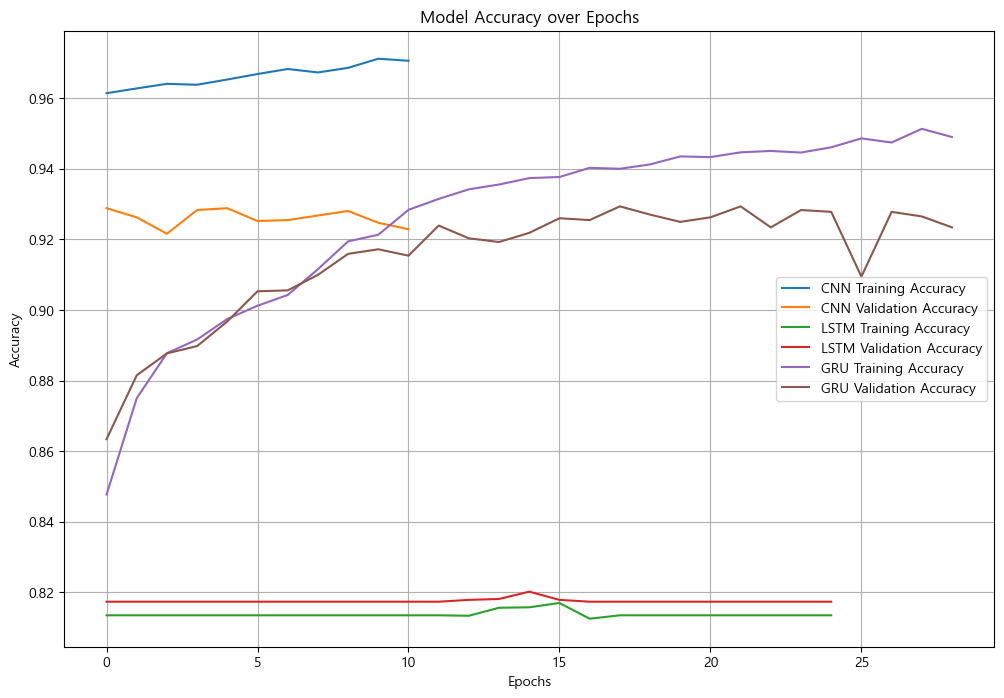

In [ ]:
import matplotlib.pyplot as plt

# 그래프 그리기
plt.figure(figsize=(12, 8))

# CNN 성능 변화
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')

# LSTM 성능 변화
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')

# GRU 성능 변화
plt.plot(gru_history.history['accuracy'], label='GRU Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation Accuracy')

# 그래프 세부 설정
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# CNN 모델 설계
cnn_model = Sequential()
cnn_model.add(Reshape((X_train_scaled.shape[1], 1), input_shape=(X_train_scaled.shape[1],)))
cnn_model.add(Conv1D(128, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.3))
cnn_model.add(Conv1D(64, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.3))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# LSTM 모델 설계
lstm_model = Sequential()
lstm_model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)))
lstm_model.add(Dropout(0.3))
lstm_model.add(LSTM(64, activation='relu'))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


# GRU 모델 설계
gru_model = Sequential()
gru_model.add(GRU(128, activation='relu', return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)))
gru_model.add(Dropout(0.3))
gru_model.add(GRU(64, activation='relu'))
gru_model.add(Dropout(0.3))
gru_model.add(Dense(64, activation='relu'))
gru_model.add(Dropout(0.3))
gru_model.add(Dense(1, activation='sigmoid'))
gru_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
# CNN 학습 및 평가
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))  # 3차원
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))      # 3차원

cnn_history = cnn_model.fit(
    X_train_cnn,
    y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)],
    verbose=1
)
cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test, verbose=1)[1]
print(f"CNN Accuracy: {cnn_accuracy}")

# RNN-LSTM 학습 및 평가
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))  # 3차원
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))      # 3차원

lstm_history = lstm_model.fit(
    X_train_lstm,
    y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)],
    verbose=1
)
lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test, verbose=1)[1]
print(f"LSTM Accuracy: {lstm_accuracy}")

# RNN-GRU 학습 및 평가
gru_history = gru_model.fit(
    X_train_lstm,
    y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)],
    verbose=1
)
gru_accuracy = gru_model.evaluate(X_test_lstm, y_test, verbose=1)[1]
print(f"GRU Accuracy: {gru_accuracy}")


Epoch 1/200
484/484 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.8720 - loss: 0.2970 - val_accuracy: 0.9213 - val_loss: 0.1823
Epoch 2/200
484/484 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9081 - loss: 0.2033 - val_accuracy: 0.9219 - val_loss: 0.1727
Epoch 3/200
484/484 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9253 - loss: 0.1828 - val_accuracy: 0.9234 - val_loss: 0.1707
Epoch 4/200
484/484 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9235 - loss: 0.1757 - val_accuracy: 0.9296 - val_loss: 0.1570
Epoch 5/200
484/484 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9297 - loss: 0.1660 - val_accuracy: 0.9317 - val_loss: 0.1557
Epoch 6/200
484/484 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9256 - loss: 0.1667 - val_accuracy: 0.9255 - val_loss: 0.1607
Epoch 7/200
484/484 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9307 - loss: 0.1549 - val_accuracy: 0.9250 - val_loss: 0.1605
Epoch 8/200
484/484 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9321 - loss: 0.1559 -

In [18]:
print(f"Deep Learning Models: CNN, LSTM, GRU")
print(f"CNN Accuracy: {cnn_accuracy}")
print(f"LSTM Accuracy: {lstm_accuracy}")
print(f"GRU Accuracy: {gru_accuracy}")

Deep Learning Models: CNN, LSTM, GRU
CNN Accuracy: 0.9391377568244934
LSTM Accuracy: 0.8139113783836365
GRU Accuracy: 0.9343074560165405


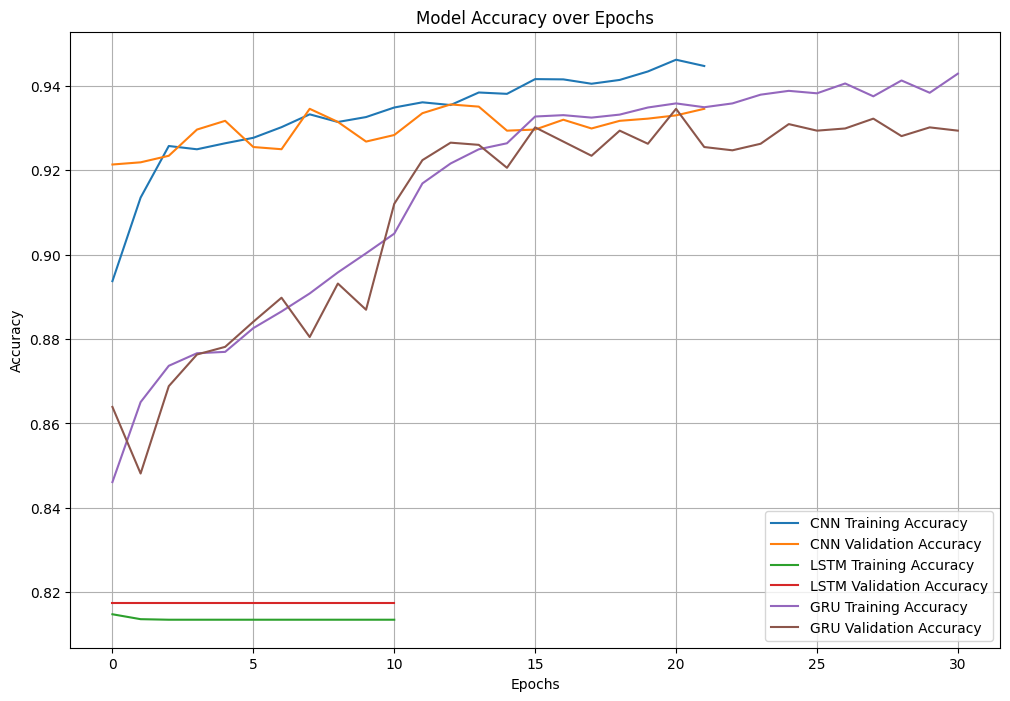

In [19]:
# 그래프 그리기
plt.figure(figsize=(12, 8))

# CNN 성능 변화
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')

# LSTM 성능 변화
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')

# GRU 성능 변화
plt.plot(gru_history.history['accuracy'], label='GRU Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation Accuracy')

# 그래프 세부 설정
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# 합성곱신경망 (CNN) - Conv1D로 수정
cnn_model = Sequential()
cnn_model.add(Reshape((X_train_scaled.shape[1], 1), input_shape=(X_train_scaled.shape[1],)))  # 2D로 Reshape 제거
cnn_model.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))  # Conv1D 사용
cnn_model.add(MaxPooling1D(pool_size=2))  # MaxPooling1D 사용
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [21]:
# CNN 학습 및 평가
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))  # 3차원
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))      # 3차원

cnn_history = cnn_model.fit(
    X_train_cnn,
    y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)],
    verbose=1
)
cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test, verbose=1)[1]
print(f"CNN Accuracy: {cnn_accuracy}")

Epoch 1/200
484/484 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.8770 - loss: 0.2797 - val_accuracy: 0.9032 - val_loss: 0.2030
Epoch 2/200
484/484 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9124 - loss: 0.1951 - val_accuracy: 0.9157 - val_loss: 0.1814
Epoch 3/200
484/484 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9242 - loss: 0.1758 - val_accuracy: 0.9213 - val_loss: 0.1709
Epoch 4/200
484/484 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9255 - loss: 0.1648 - val_accuracy: 0.9198 - val_loss: 0.1863
Epoch 5/200
484/484 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9280 - loss: 0.1610 - val_accuracy: 0.9255 - val_loss: 0.1641
Epoch 6/200
484/484 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9318 - loss: 0.1573 - val_accuracy: 0.9299 - val_loss: 0.1667
Epoch 7/200
484/484 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9354 - loss: 0.1508 - val_accuracy: 0.9291 - val_loss: 0.1654
Epoch 8/200
484/484 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9375 - loss: 0.1

In [22]:
print(f"Deep Learning Models: CNN-Conv1D")
print(f"CNN Accuracy: {cnn_accuracy}")

Deep Learning Models: CNN-Conv1D
CNN Accuracy: 0.9294770956039429


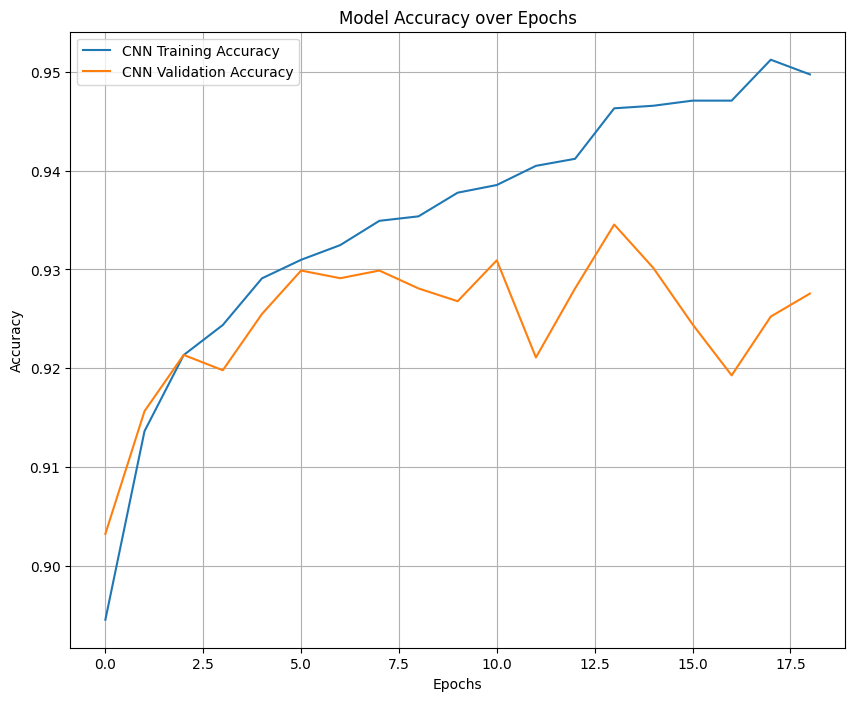

In [23]:
# 그래프 그리기
plt.figure(figsize=(10, 8))

# CNN 성능 변화
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')

# 그래프 세부 설정
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()